In [ ]:
## Aggregating MQTT Data

In [12]:
import datetime
from Adafruit_IO import *
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
dStamp=datetime.datetime.now().strftime("%m_%d_%Y")
hashPath = '/Users/cad/simpHashes/csIO.txt'

In [35]:
def connect_REST(hashPath):
    simpHash=open(hashPath)
    a=list(simpHash)
    userName = a[0].strip()
    apiKey = a[1]
    restClient = Client(userName,apiKey)
    return restClient
    
def connect_MQTT(hashPath):
    simpHash=open(hashPath)
    a=list(simpHash)
    userName = a[0].strip()
    apiKey = a[1]
    mqttClient = MQTTClient(userName,apiKey)
    return mqttClient

def makeMQTTDataFrame(feedName):
    tCreated_ats=[]
    tDates=[]
    tTimes=[]
    tIDs = []
    tValues=[]
    tFeedNames = []
    count = []
    counter = 0
    allData = aio.data(feedName)
    for x in allData:
        tCreated_ats.append(x.created_at)
        tS=x.created_at.split('T')
        tDates.append(tS[0])
        tTimes.append(tS[1])
        tIDs.append(x.id)
        tValues.append(float(x.value))
        tFeedNames.append(feedName)
        counter = counter + 1
        count.append(counter)

    tempArray = [count,tFeedNames,tCreated_ats,tDates,tTimes,tIDs,tValues]
    varIndex = ['count','feed_name','created_at','date','time','id','value']
    tempArray=list(list(zip(*tempArray)))
    newDF = pd.DataFrame(tempArray,columns = varIndex)
    return newDF

In [5]:
aio=connect_REST(hashPath)
# check all the feeds
# This will make a list of all feeds.
allFeeds = aio.feeds()

feedList = []
for things in allFeeds:
    feedList.append(things.name)
print(feedList)

['rig-cadbook', 'cad-rig', 'cad-waterconsumed', 'cad-topvol', 'cad-weight', 'cad2-rig', 'cad2-waterconsumed', 'cad2-topvol', 'cad2-weight', 'newFeed', 'cadbook', 'rig-ubuntu']


In [36]:
cadWater = makeMQTTDataFrame('cad-waterconsumed')

In [10]:
import seaborn as sns

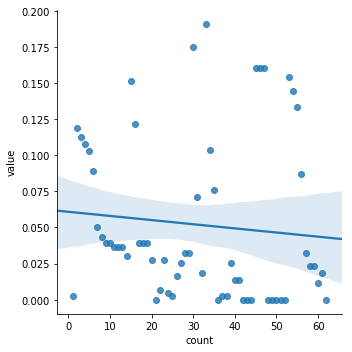

In [38]:
sns.lmplot(x='count', y='value', data=cadWater)